In [2]:
import pandas as pd
import seaborn as sns

from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Housing.csv')
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [4]:
def razvedka(df):
    print('The shape is ', df.shape) # find shape

    a = df.isnull().values.any() #determinate if values miss
    print('Missing values: ', a)

    if a == True:
        print('''How many missing values: ''',
        df.isnull().sum()) # how many missing values
        df = df.dropna()
        print('values has been cleaned')
        print(a)

    df.info()
razvedka(df)

The shape is  (545, 13)
Missing values:  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df['mainroad'] = pd.factorize(df.mainroad)[0]
df['guestroom'] = pd.factorize(df.guestroom)[0]
df['basement'] = pd.factorize(df.basement)[0]
df['hotwaterheating'] = pd.factorize(df.hotwaterheating)[0]
df['airconditioning'] = pd.factorize(df.airconditioning)[0]

df['prefarea'] = pd.factorize(df.prefarea)[0]
df['furnishingstatus'] = pd.factorize(df.furnishingstatus)[0]

In [7]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0
5,10850000,7500,3,3,1,0,0,1,0,0,2,0,1
6,10150000,8580,4,3,4,0,0,0,0,0,2,0,1
7,10150000,16200,5,3,2,0,0,0,0,1,0,1,2
8,9870000,8100,4,1,2,0,1,1,0,0,2,0,0
9,9800000,5750,3,2,4,0,1,0,0,0,1,0,2


<AxesSubplot: >

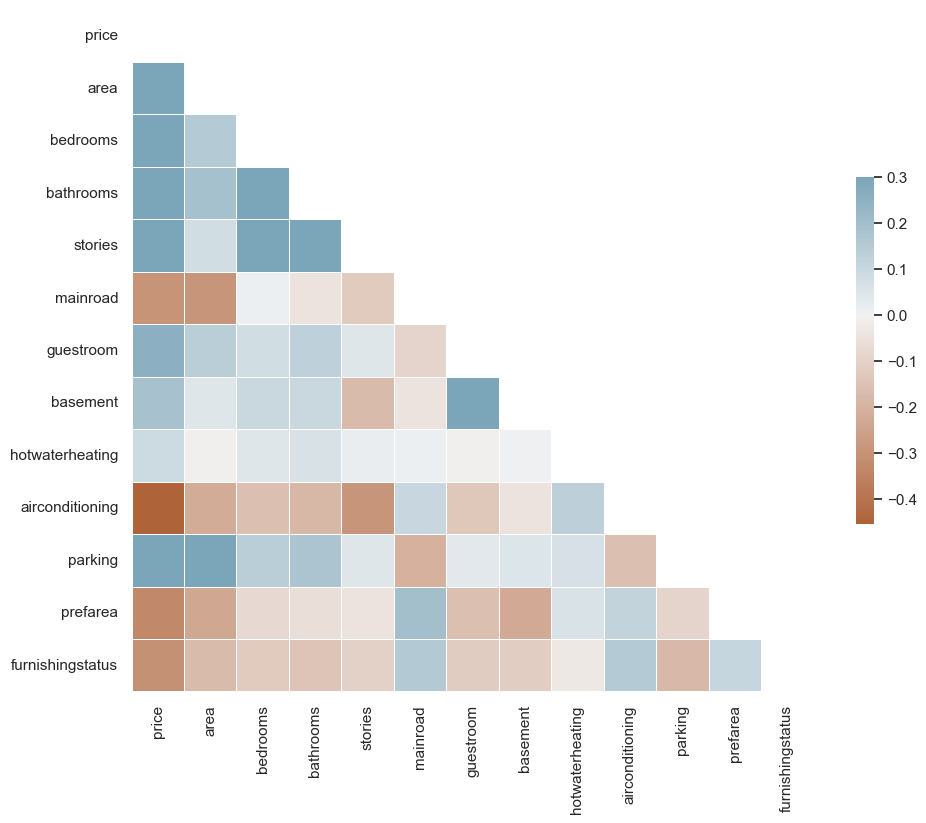

In [8]:
sns.set_theme(style="white")
corr = df.corr()
# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# custom colormap
cmap = sns.diverging_palette(30, 230, as_cmap=True)
# heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

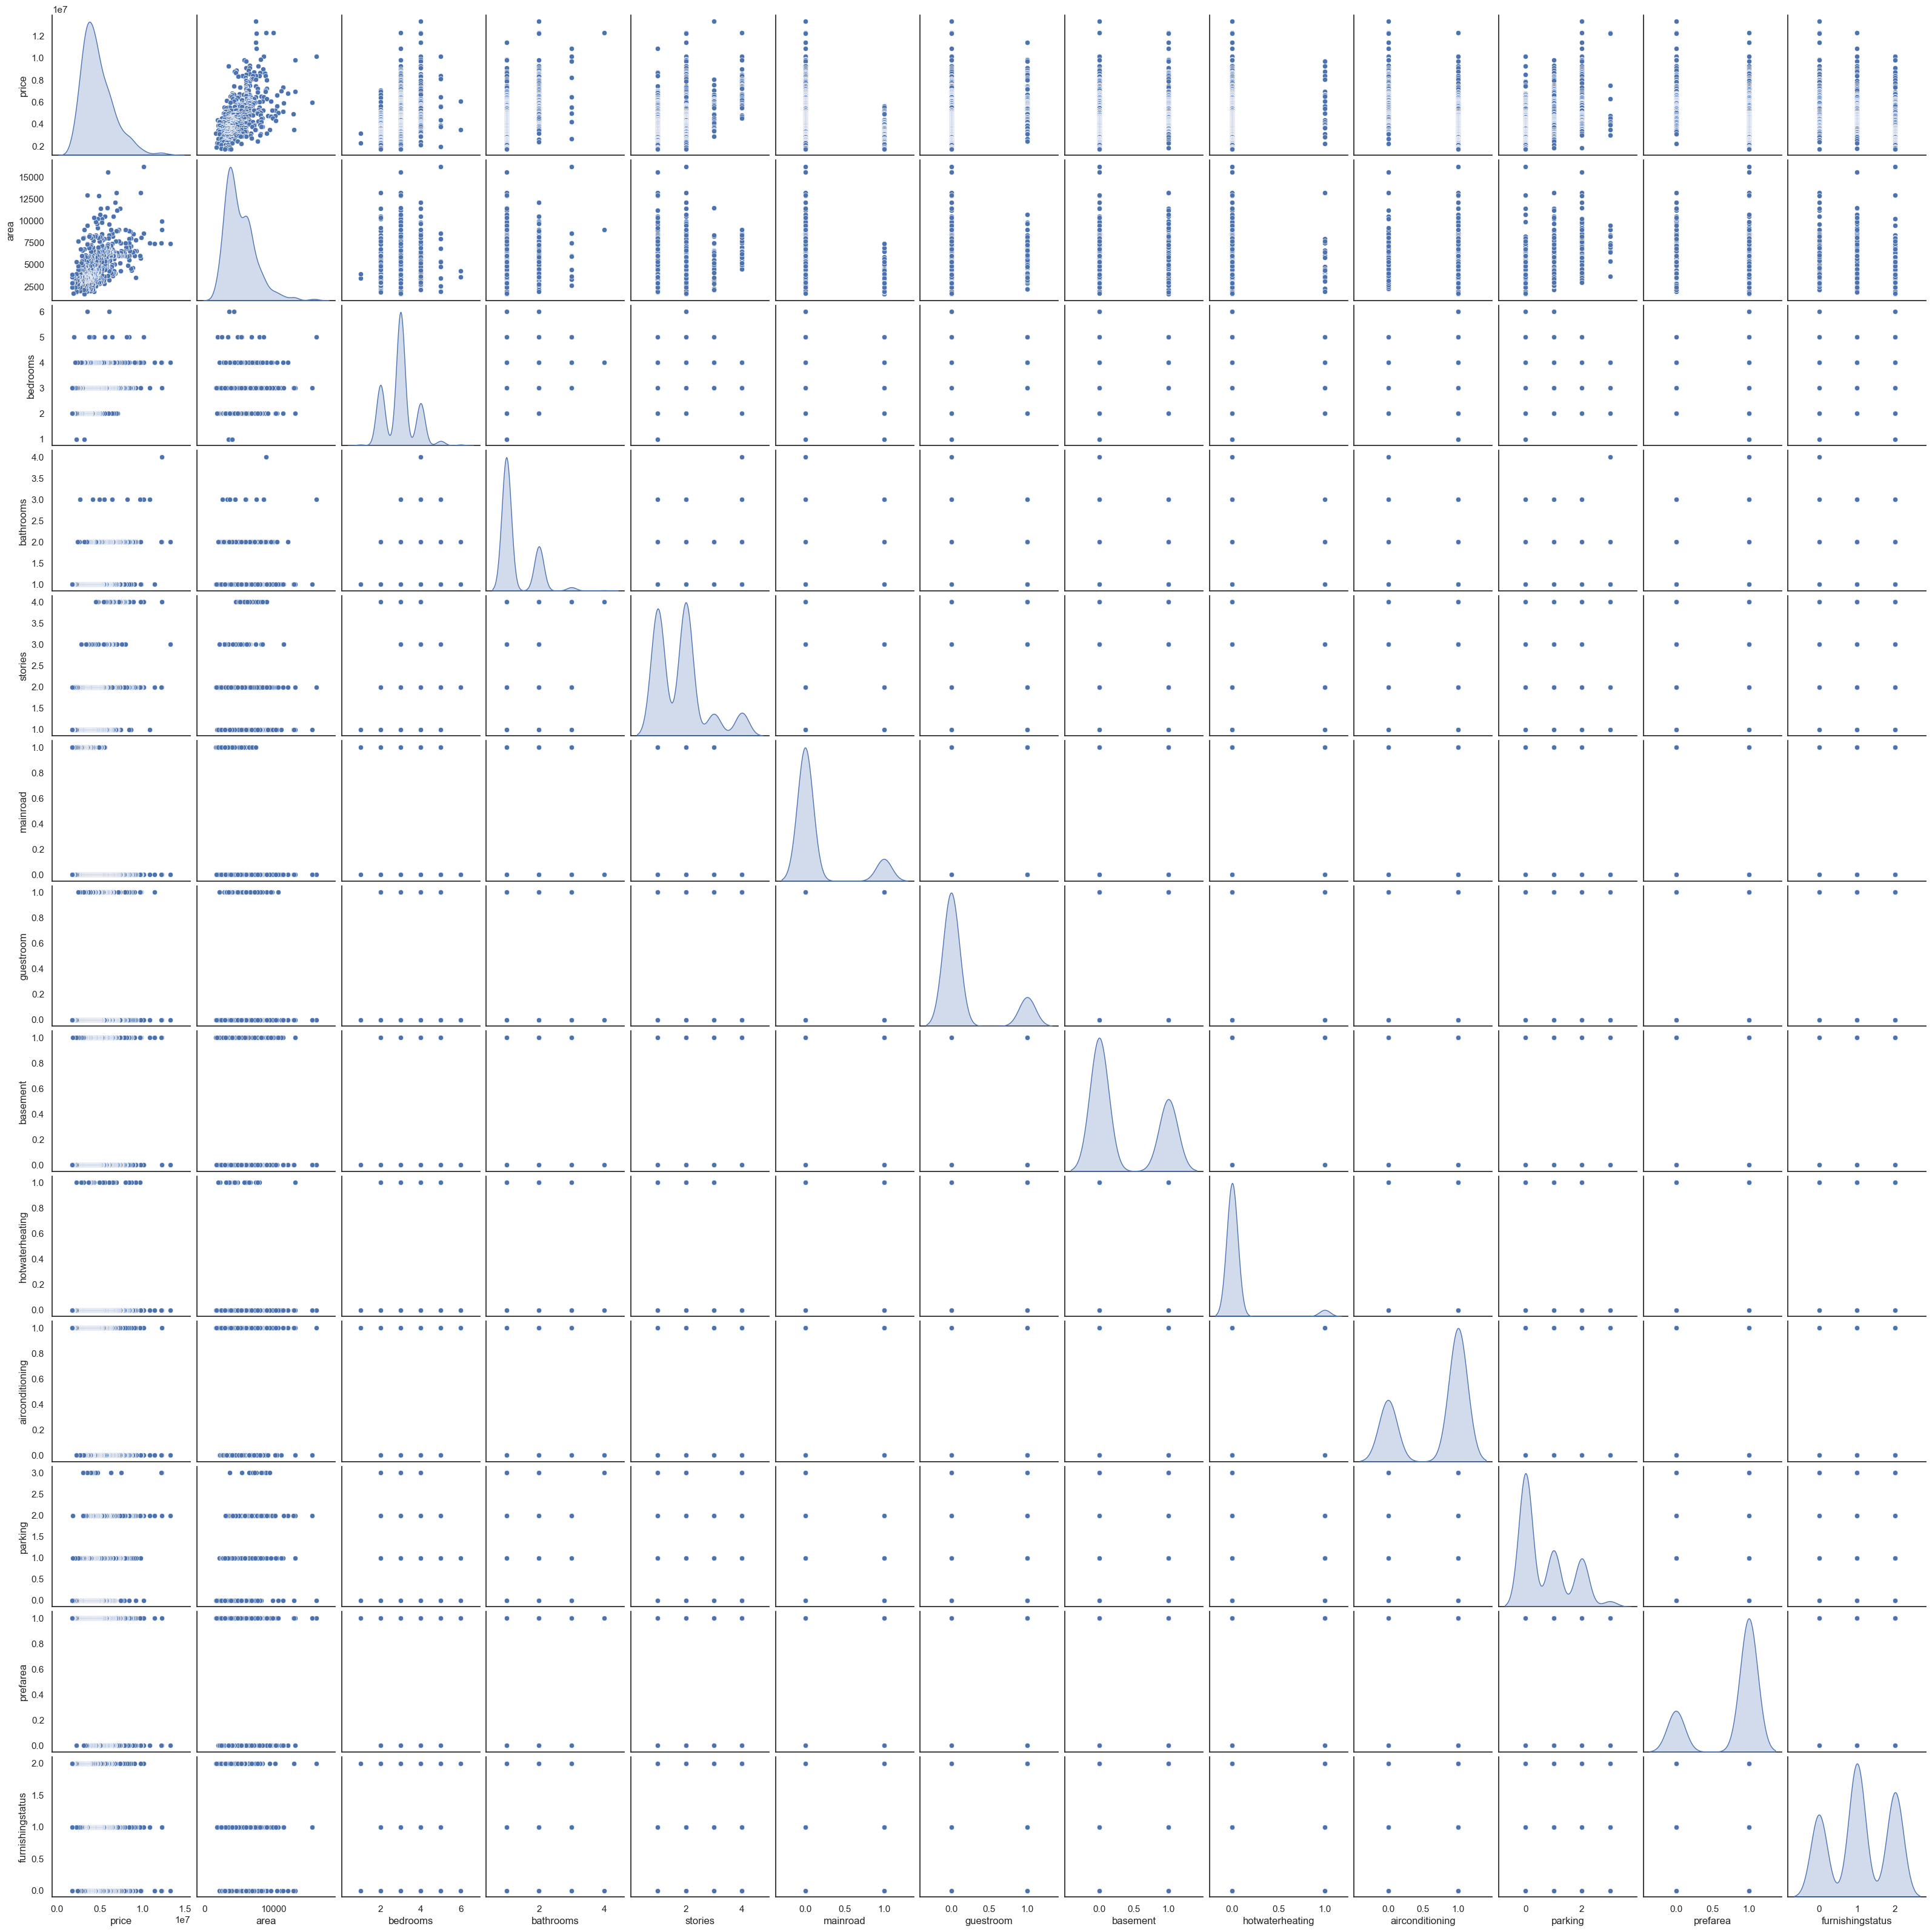

In [9]:
sns.pairplot(df, diag_kind='kde')

In [10]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [14]:
predictedDis = regr.predict([[9000, 2, 3, 2, 0, 1, 0, 0, 1, 2, 0, 0]])
print(predictedDis)

[8476478.34796626]


/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='price', ylabel='area'>

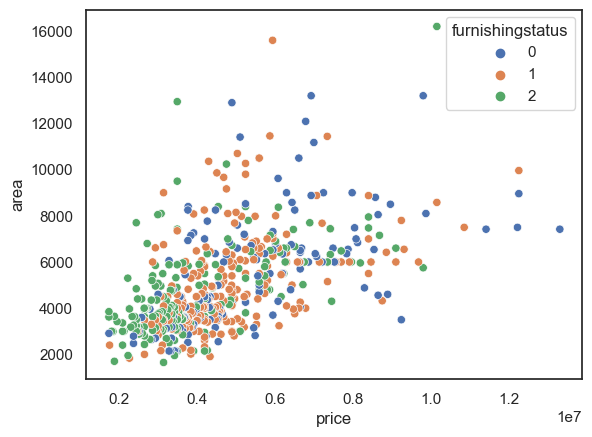

In [22]:
sns.scatterplot(x=df['price'],y=df['area'], hue=df['furnishingstatus'], palette='deep')

In [18]:
from sklearn.preprocessing import StandardScaler

X = df[['price' ,'area']]
y = df['furnishingstatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) # very low

Accuracy: 0.3853211009174312
